### Search insert position

Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.

**Example 1:**
```
Input: nums = [1,3,5,6], target = 5
Output: 2
```
**Example 2:**
```
Input: nums = [1,3,5,6], target = 2
Output: 1
```
**Example 3:**
```
Input: nums = [1,3,5,6], target = 7
Output: 4
```
**Example 4:**
```
Input: nums = [1,3,5,6], target = 0
Output: 0
```
**Example 5:**
```
Input: nums = [1], target = 0
Output: 0
```
#### Constraints:
```
1 <= nums.length <= 10^4
-10^4 <= nums[i] <= 10^4
nums contains distinct values sorted in ascending order.
-10^4 <= target <= 10^4
```

In [1]:
import numpy as np
from typing import List

from utils.profiler import time_this, timed_report
from utils.profiler import ExponentialRange

import gc

In [2]:
@time_this(lambda *args, **kwargs: len(args[0]))

def searchInsert_1(nums, target):
    try:
        return nums.index(target)
    except: # Now we certainly know the number is not in the list
        last_index = len(nums) - 1
        for i, x in enumerate(nums):
            if i == 0 and target < x: #first item
                return 0
            elif i == last_index and target > x:
                return i + 1
            elif target < x and target < nums[i+1]:
                return i
            elif target > x and target < nums[i+1]:
                return i + 1

In [3]:
# print(searchInsert_1([1,3,5,6],5)) # 2
    
# print(searchInsert_1([1,3,5,6], 2)) # 1

# print(searchInsert_1([1,3,5,6], 7)) # 4

# print(searchInsert_1([1,3,5,6], 0)) # 0

# print(searchInsert_1([1], 0)) # 0

# print(searchInsert_1([1,3],2)) # 1 

### Great results!

![img](img/Screenshot_6.png)

### Another version (probably slower)

In [4]:
@time_this(lambda *args, **kwargs: len(args[0]))

def searchInsert_2(nums, target):
    try:
        return nums.index(target)
    except: # Now we certainly know the number is not in the list
        nums.append(target)
        return sorted(nums).index(target)

### Not bad!

![img](img/Screenshot_7.png)

## Instructor's code: Binary Search

Pseudocode:

![img](img/pseud2.png)

In [5]:
@time_this(lambda *args, **kwargs: len(args[0]))

def searchInsert_3(nums, target):
    lo = 0
    hi = len(nums) - 1
    
    while lo <= hi:  # We want pointers to cross
        mid = int((hi + lo) / 2)
        mid_val = nums[mid]
        
        if target == mid_val:
            return mid
        elif target > mid_val:
            lo = mid + 1
        else:
            hi = mid - 1
    return lo

### Weird...

![img](img/Screenshot_8.png)

## Conlan Profiler


In [6]:
def ordered_numeric_list(n: int) -> List[float]:
    return sorted(list(np.random.random(n)))

searchInsert_1
    n   = 100 values
    t   = 0.115 ms
    n/t = 869.5652 values per ms

searchInsert_1
    n   = 1000 values
    t   = 1.035 ms
    n/t = 965.9969 values per ms

searchInsert_1
    n   = 10000 values
    t   = 20.025 ms
    n/t = 499.3658 values per ms

searchInsert_1
    n   = 100000 values
    t   = 174.675 ms
    n/t = 572.4921 values per ms

searchInsert_2
    n   = 101 values
    t   = 0.054 ms
    n/t = 1856.6176 values per ms

searchInsert_2
    n   = 1001 values
    t   = 0.463 ms
    n/t = 2162.4541 values per ms

searchInsert_2
    n   = 10001 values
    t   = 9.063 ms
    n/t = 1103.5343 values per ms

searchInsert_2
    n   = 100001 values
    t   = 91.17 ms
    n/t = 1096.8654 values per ms

searchInsert_3
    n   = 100 values
    t   = 0.022 ms
    n/t = 4608.2949 values per ms

searchInsert_3
    n   = 1000 values
    t   = 0.019 ms
    n/t = 53191.4894 values per ms

searchInsert_3
    n   = 10000 values
    t   = 0.021 ms
    n/t = 476190.4762 values p

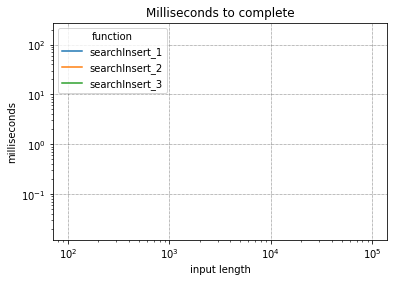

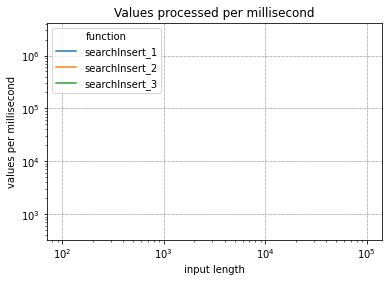

In [7]:
exp_range = ExponentialRange(2, 7, 1)
values = ordered_numeric_list(exp_range.max)

with timed_report():
    for i in exp_range.iterator(5):
        searchInsert_1(values[:i], 100)
        gc.collect()

    for i in exp_range.iterator(5):
        searchInsert_2(values[:i], 100)
        gc.collect()

    for i in exp_range.iterator(5):
        searchInsert_3(values[:i], 100)
        gc.collect()